## 代码参考来源：https://github.com/nathanhubens/Autoencoders

## 利用手写体数据集实现四种自编码器：
1.单层自编码器   
2.多层自编码器  
3.卷积自编码器    
4.正则自编码器  

In [145]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Layer, Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils

***
# 1.单层自编码器

## 读取手写体数据及与图像预处理

In [146]:
(X_train, _), (X_test, _) = mnist.load_data()

In [147]:

#  归一化
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


### np.prod是将28X28矩阵转化成1X784，方便BP神经网络输入层784个神经元读取。

In [148]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

## 构建自编码器模型

In [149]:
input_size = 784
hidden_size = 64
output_size = 784

In [150]:
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

## 模型可视化

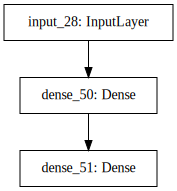

In [151]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

## 训练

In [152]:

epochs = 5
batch_size = 128

history = autoencoder.fit(X_train, X_train, 
                          batch_size=batch_size, 
                          epochs=epochs, verbose=1, 
                          validation_data=(X_test, X_test)
                         )

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.0446 - val_loss: 0.0224
Epoch 2/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.0174 - val_loss: 0.0130
Epoch 3/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.0110 - val_loss: 0.0089
Epoch 4/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.0080 - val_loss: 0.0067
Epoch 5/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.0064 - val_loss: 0.0056


##  查看自编码器的压缩效果

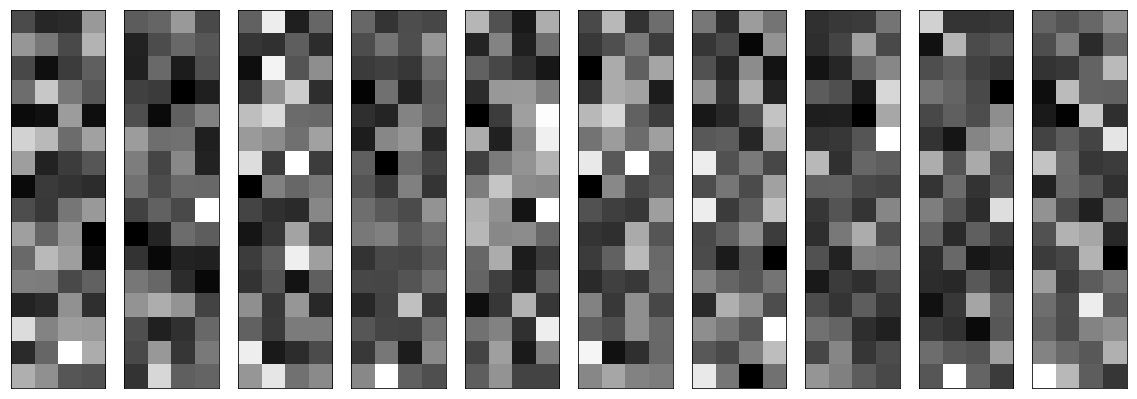

In [153]:
conv_encoder = Model(x, h)  # 只取编码器做模型
encoded_imgs = conv_encoder.predict(X_test)

# 打印10张测试集手写体的压缩效果
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 16).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 查看自编码器的解码效果

In [154]:
decoded_imgs = autoencoder.predict(X_test)

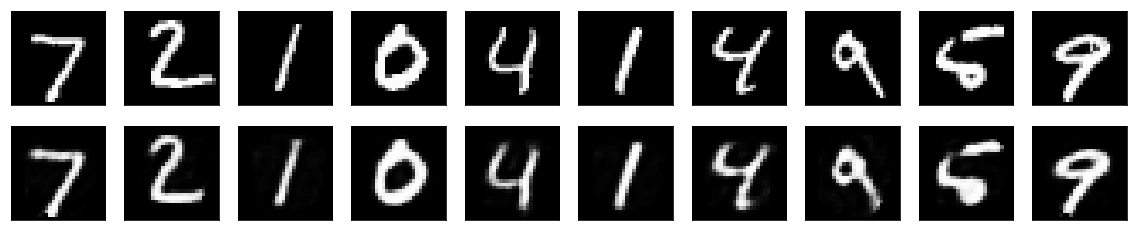

In [155]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # 打印原图
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # 打印解码图
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

## 训练过程可视化

dict_keys(['val_loss', 'loss'])


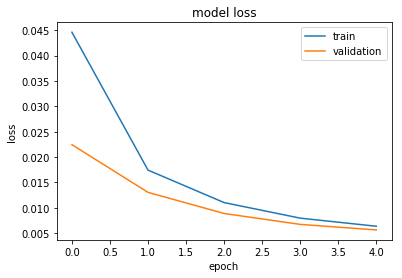

In [156]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

***
# 2.多层自编码器

## 多层自编码器建模

In [157]:
input_size = 784
hidden_size = 128
code_size = 64

x = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(x)
h = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(h)
r = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

## 模型可视化

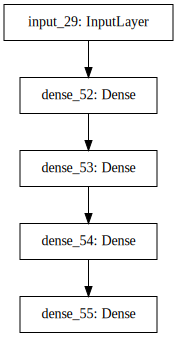

In [158]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

## 训练模型

In [159]:
epochs = 5
batch_size = 128

history = autoencoder.fit(X_train, X_train, 
                          batch_size=batch_size, 
                          epochs=epochs, 
                          verbose=1, 
                          validation_data=(X_test, X_test)
                         )

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 93us/step - loss: 0.0410 - val_loss: 0.0196
Epoch 2/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.0162 - val_loss: 0.0133
Epoch 3/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.0119 - val_loss: 0.0103
Epoch 4/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.0099 - val_loss: 0.0088
Epoch 5/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.0087 - val_loss: 0.0081


## 查看编码效果

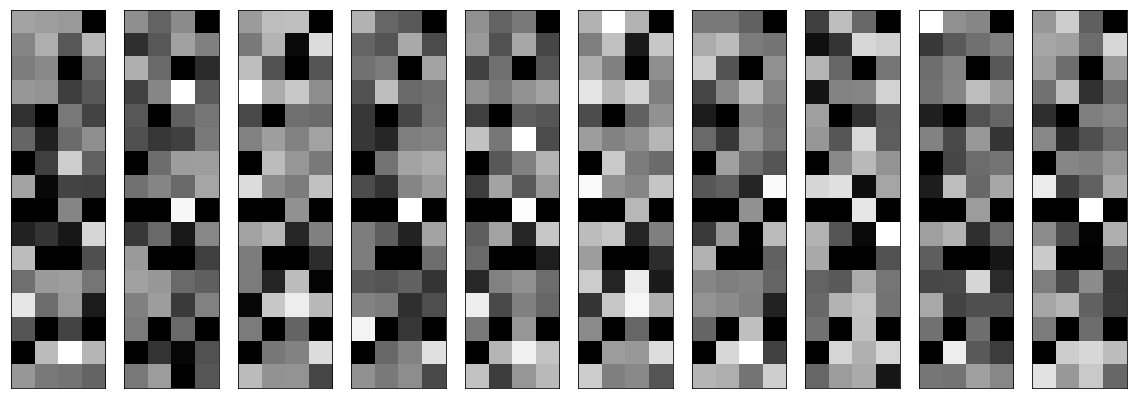

In [160]:
conv_encoder = Model(x, h)  # 只取编码器做模型
encoded_imgs = conv_encoder.predict(X_test)

# 打印10张测试集手写体的压缩效果
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 16).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 查看解码效果

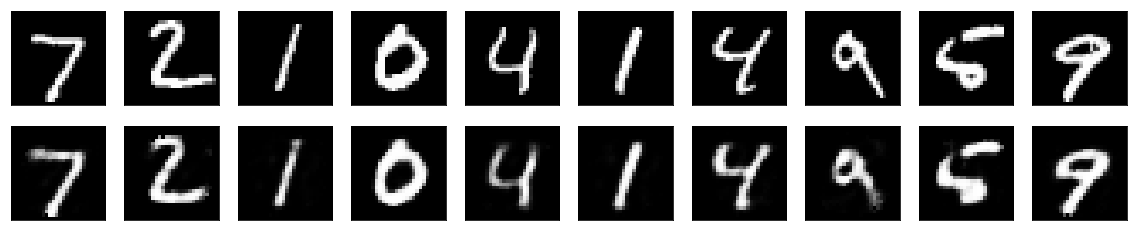

In [161]:
decoded_imgs = autoencoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # 原图
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # 解码效果图
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

## 训练过程可视化

dict_keys(['val_loss', 'loss'])


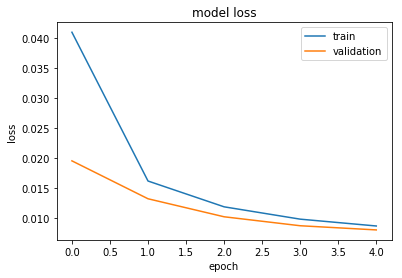

In [162]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

***
# 3.卷积自编码器

## 读取数据集

In [163]:
nb_classes = 10  # 10类

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# 归一化
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## 卷积自编码器建模

In [164]:
x = Input(shape=(28, 28,1)) 

# 编码器
conv1_1 = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
conv1_3 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool2)
h = MaxPooling2D((2, 2), padding='same')(conv1_3)


# 解码器
conv2_1 = Conv2D(8, (3, 3), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
conv2_3 = Conv2D(16, (3, 3), activation='relu')(up2)
up3 = UpSampling2D((2, 2))(conv2_3)
r = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up3)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

## 模型可视化

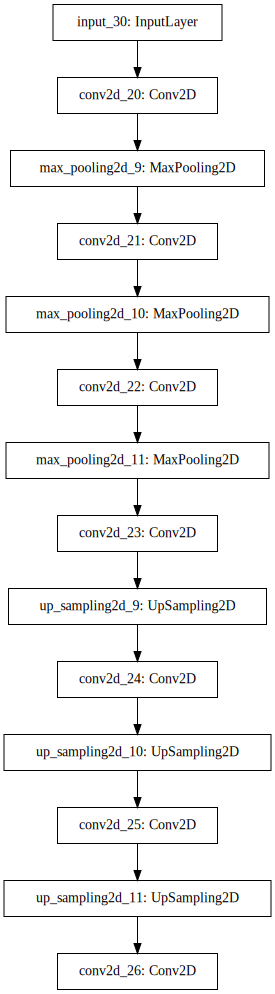

In [165]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

In [166]:
epochs = 3
batch_size = 128

history = autoencoder.fit(X_train, X_train, 
                          batch_size=batch_size, 
                          epochs=epochs, verbose=1, 
                          validation_data=(X_test, X_test)
                         )

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 65s 1ms/step - loss: 0.2138 - val_loss: 0.1643
Epoch 2/3
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1528 - val_loss: 0.1448
Epoch 3/3
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1385 - val_loss: 0.1295


## 查看解码效果

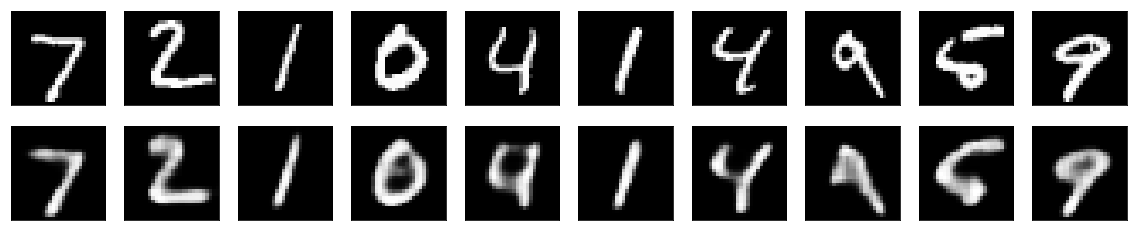

In [167]:
decoded_imgs = autoencoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # 原图
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # 解码效果图
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

## 训练过程可视化

dict_keys(['val_loss', 'loss'])


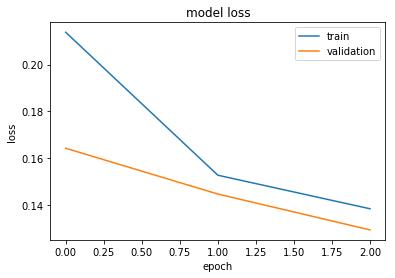

In [168]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

***
# 4.正则自编码器  
两种类型：  
1.稀疏正则自编码器  
2.去噪正则自编码器

## 1.稀疏正则自编码器

## 读取数据集

In [183]:
(X_train, _), (X_test, _) = mnist.load_data()

#  归一化
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')



X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


### np.prod是将28X28矩阵转化成1X784，方便BP神经网络输入层784个神经元读取。

In [184]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

## 稀疏正则自编码器建模

In [185]:
input_size = 784
hidden_size = 32
output_size = 784

x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu', activity_regularizer=regularizers.l1(10e-5))(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

## 训练

In [186]:
epochs = 15
batch_size = 128

history = autoencoder.fit(X_train, X_train, 
                          batch_size=batch_size, 
                          epochs=epochs, 
                          verbose=1, 
                          validation_data=(X_test, X_test)
                         )

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 65us/step - loss: 0.1948 - val_loss: 0.1632
Epoch 2/15
60000/60000 [==============================] - 2s 39us/step - loss: 0.1416 - val_loss: 0.1242
Epoch 3/15
60000/60000 [==============================] - 2s 39us/step - loss: 0.1120 - val_loss: 0.1025
Epoch 4/15
60000/60000 [==============================] - 2s 38us/step - loss: 0.0954 - val_loss: 0.0901
Epoch 5/15
60000/60000 [==============================] - 2s 39us/step - loss: 0.0857 - val_loss: 0.0826
Epoch 6/15
60000/60000 [==============================] - 2s 38us/step - loss: 0.0798 - val_loss: 0.0780
Epoch 7/15
60000/60000 [==============================] - 2s 38us/step - loss: 0.0760 - val_loss: 0.0749
Epoch 8/15
60000/60000 [==============================] - 2s 38us/step - loss: 0.0735 - val_loss: 0.0729
Epoch 9/15
60000/60000 [==============================] - 2s 38us/step - loss: 0.0718 - val_loss: 0.0714
Epoch

## 模型可视化

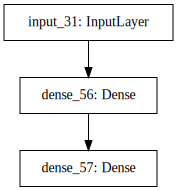

In [173]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

## 查看解码效果

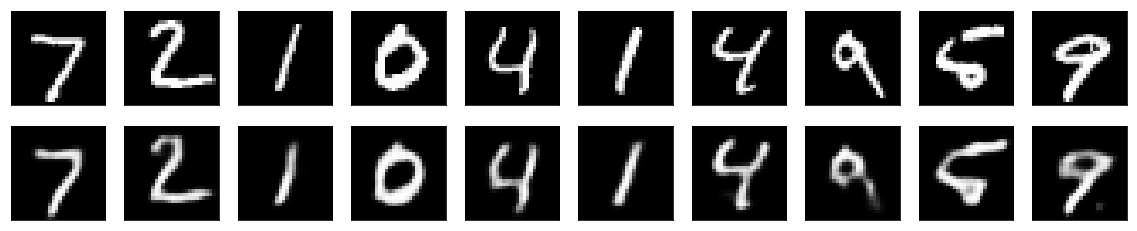

In [187]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # 原图
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # 解码效果图
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

## 训练过程可视化

dict_keys(['val_loss', 'loss'])


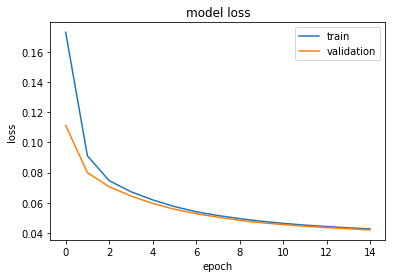

In [175]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## 2.去噪自编码器

## 读取数据集

In [176]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

## 加噪

In [177]:
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

## 去噪自编码器建模

In [178]:
x = Input(shape=(28, 28, 1))

# 编码器
conv1_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1)
h = MaxPooling2D((2, 2), padding='same')(conv1_2)


# 解码器
conv2_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
r = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

## 模型可视化

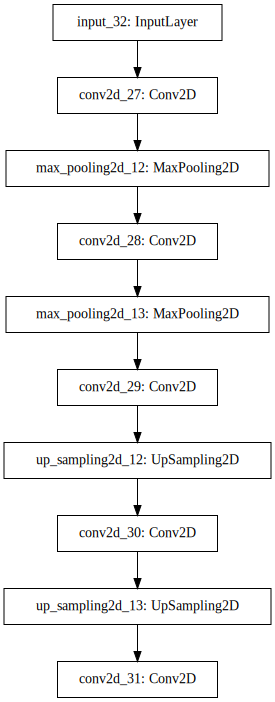

In [179]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

## 训练

In [180]:
epochs = 3
batch_size = 128

history = autoencoder.fit(X_train_noisy, X_train, 
                          batch_size=batch_size,
                          epochs=epochs, verbose=1,
                          validation_data=(X_test_noisy, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 65s 1ms/step - loss: 0.1772 - val_loss: 0.1247
Epoch 2/3
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1205 - val_loss: 0.1128
Epoch 3/3
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1126 - val_loss: 0.1120


## 查看解码效果

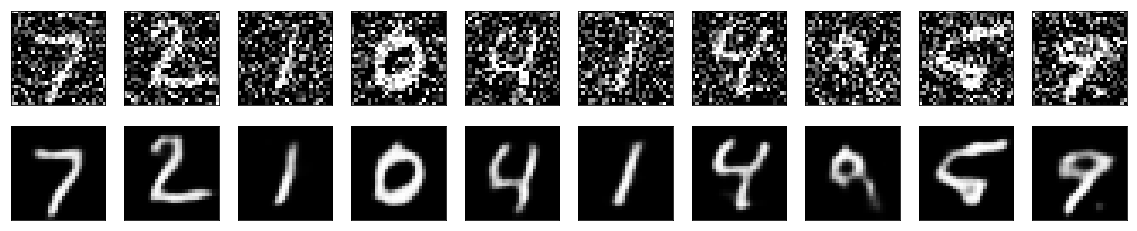

In [181]:
decoded_imgs = autoencoder.predict(X_test_noisy)

n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # 原图
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # 解码效果图
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

## 训练过程可视化

dict_keys(['val_loss', 'loss'])


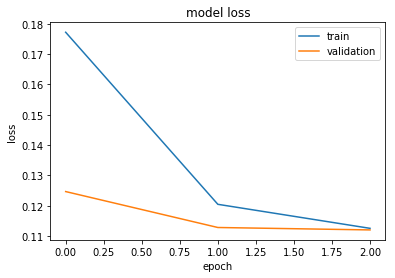

In [182]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()